TASK 3: CLUSTERING

APPLICATION OF TWO CLUSTERING ALGORITHMS ON STUDENT’S PERFORMANCE AND THEIR PREPARATION TECHNIQUES USING PYTHON

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Run before importing KMeans
import os
os.environ["OMP_NUM_THREADS"] = '1'

#Importing the metrics
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# imported warning just to avoid unneccesary messages in the cells output
import warnings
warnings.filterwarnings('ignore')

LOADING AND VIEWING THE DATASET

In [2]:
knowledge_level = pd.read_csv('data_user_modeling.csv')
print(f'knowledge_level data shape: {knowledge_level.shape}')
knowledge_level.head()

knowledge_level data shape: (258, 6)


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
#checking the data type of the dataset
knowledge_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5   UNS     258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


DATA PREPROCESSING AND CLEANING

In [4]:
#Checking and counting duplicates
knowledge_level.duplicated().sum()

0

In [5]:
#Check the percentage of missing data
total = knowledge_level.isnull().sum().sort_values(ascending = False)
percent = (knowledge_level.isnull().sum() / knowledge_level.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
STG,0,0.0
SCG,0,0.0
STR,0,0.0
LPR,0,0.0
PEG,0,0.0
UNS,0,0.0


In [6]:
#Check the statistical analysis of the dataset

knowledge_level.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [7]:
knowledge_level.describe(include='all')

,STG,SCG,STR,LPR,PEG,UNS
count,258.000000,258.000000,258.000000,258.000000,258.000000,258
unique,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,Middle
freq,NaN,NaN,NaN,NaN,NaN,88
mean,0.371147,0.355674,0.468004,0.432713,0.458539,NaN
std,0.210271,0.211962,0.245940,0.248108,0.255211,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.240750,0.210000,0.291250,0.250000,0.250000,NaN
50%,0.327000,0.302500,0.490000,0.330000,0.500000,NaN
75%,0.495000,0.497500,0.690000,0.647500,0.660000,NaN


In [8]:
##View the dataset that are object 
dtype_object=knowledge_level.select_dtypes(include=['object'])
dtype_object.head()

,UNS
0,very_low
1,High
2,Low
3,Middle
4,Low


In [9]:
# view the labels in the variable

##View the dataset that are object and check for their unique values 
for x in dtype_object.columns:
    print("{} unique values:".format(x),knowledge_level[x].unique())
    print("*"*20)

UNS unique values: ['very_low' 'High' 'Low' 'Middle']
********************


EXPLORATORY DATA ANALYSIS

In [10]:
#Counting the frequencies of the unique values in the UNC column
knowledge_level['UNS'].value_counts()

Middle      88
Low         83
High        63
very_low    24
Name: UNS, dtype: int64

<AxesSubplot:xlabel='UNS', ylabel='count'>

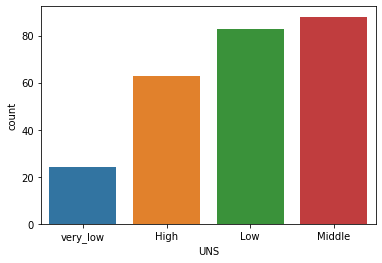

In [11]:
#plotting the UNC column
sns.countplot(knowledge_level['UNS'])

<AxesSubplot:>

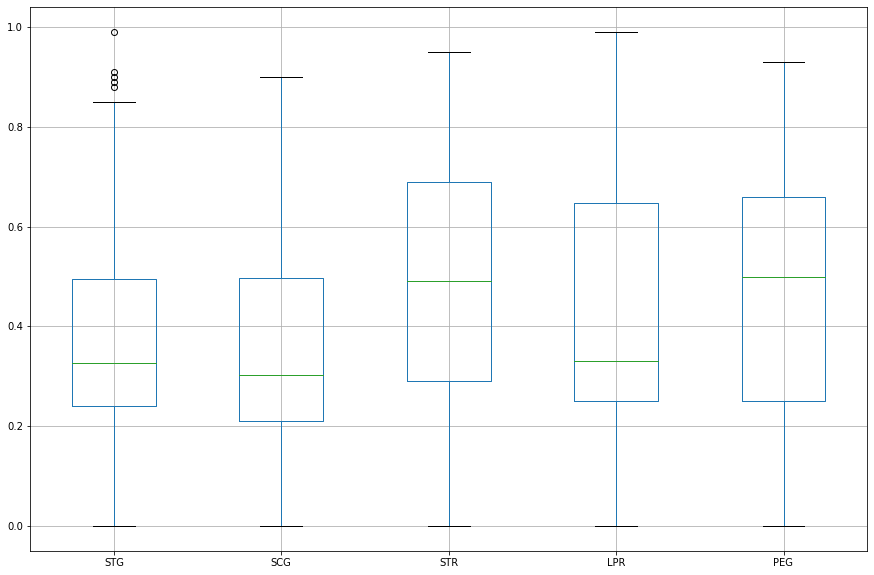

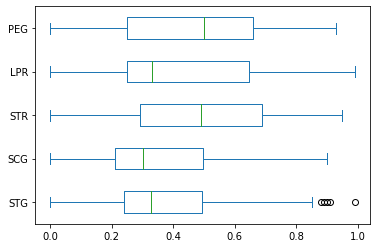

In [12]:
#Boxplot to determine outliers and noise in the dataset
#Horizontal default boxplot chart
knowledge_level.boxplot(figsize=(15, 10))
#Vertical Boxplot chart
knowledge_level.plot.box(vert=False)

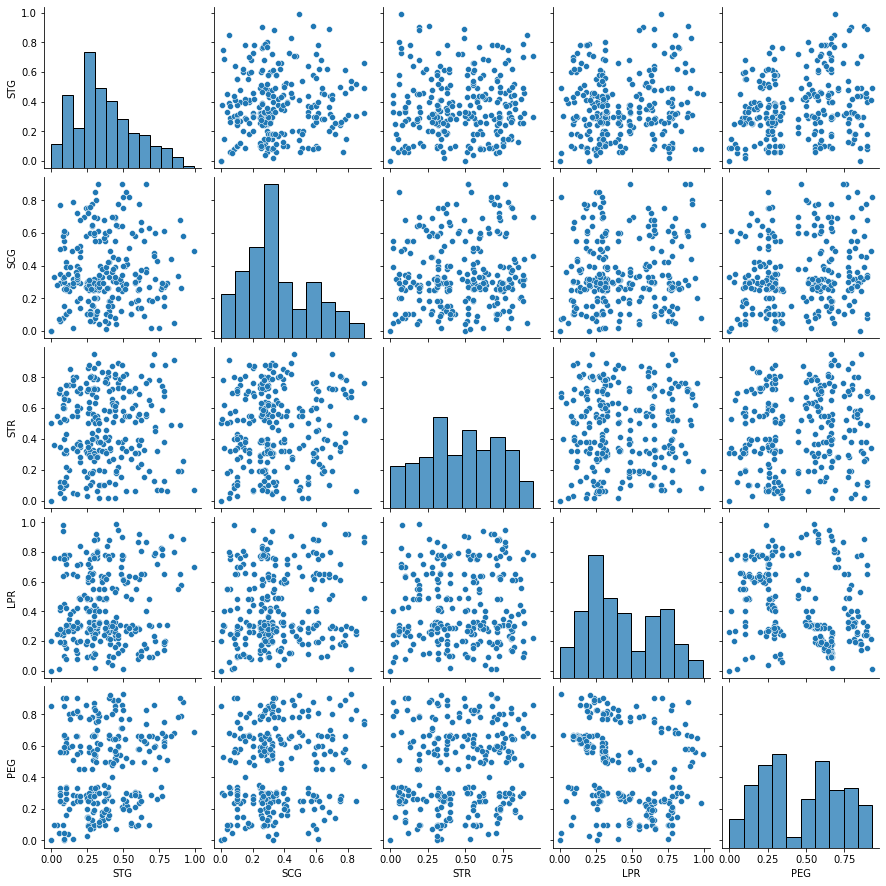

In [13]:
#visualizing the variables

sns.pairplot(knowledge_level.iloc[:,0:5])

In [14]:
#correlational analysis of the dataset

(knowledge_level.iloc[:,0:5]).corr()

,STG,SCG,STR,LPR,PEG
STG,1.000000,0.081035,0.040841,0.099543,0.206359
SCG,0.081035,1.000000,0.083732,0.097816,0.182792
STR,0.040841,0.083732,1.000000,0.036481,0.120779
LPR,0.099543,0.097816,0.036481,1.000000,-0.269574
PEG,0.206359,0.182792,0.120779,-0.269574,1.000000


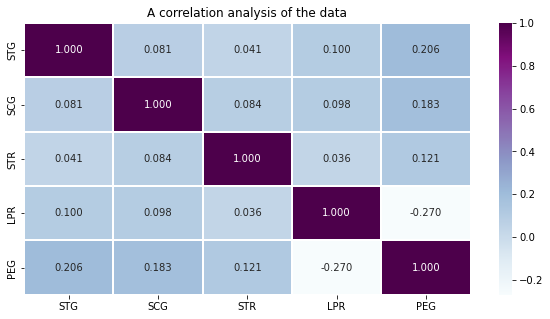

In [15]:
#A plot showing the correlational analysis of the dataset
plt.figure(figsize=(10,5))
sns.heatmap((knowledge_level.iloc[:,0:5]).corr(),annot=True,cmap='BuPu',fmt='.3f',linewidths=2)
plt.title('A correlation analysis of the data')
plt.show()

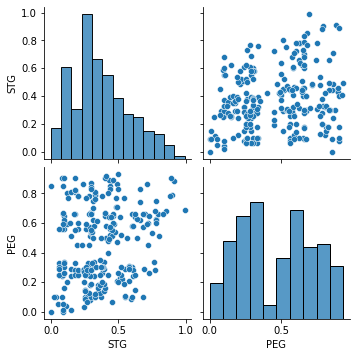

In [16]:
# visualizing the test variables (STR &PEG)
test = knowledge_level.iloc[:,[0,4]]
sns.pairplot(test)

In [17]:
#correlational analysis of the test variables
test.corr()

,STG,PEG
STG,1.000000,0.206359
PEG,0.206359,1.000000


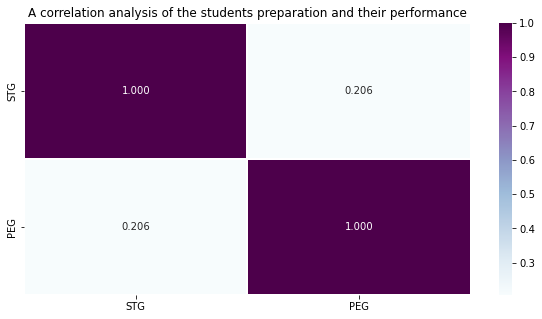

In [18]:
#A plot showing the correlational analysis of the dataset
plt.figure(figsize=(10,5))
sns.heatmap(test.corr(),annot=True,cmap='BuPu',fmt='.3f',linewidths=2)
plt.title('A correlation analysis of the students preparation and their performance')
plt.show()

In [19]:
#performing scaling or normalisation before carrying out clustering

sc_test = StandardScaler()
X = sc_test.fit_transform(test)

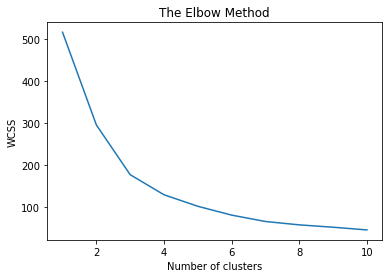

In [20]:
#Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

KMEANS CLUSTERING

In [21]:
# Fitting K-Means to the dataset 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

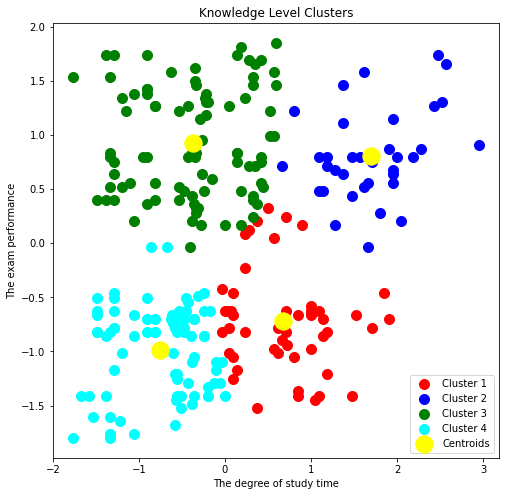

In [22]:
# Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Knowledge Level Clusters')
plt.xlabel('The degree of study time')
plt.ylabel('The exam performance')
plt.legend()
plt.show()

In [23]:
# Calculating the Silhouetter Score to determine the goodness of a clustering technique
score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.2f' % score)

Silhouetter Score: 0.42


HIERARCHICAL CLUSTERING

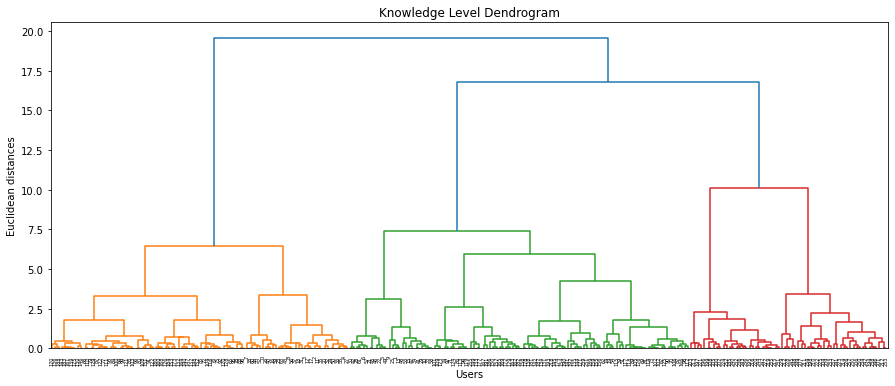

In [28]:
#Hierarchical Clustering to group the data into a tree of clusters (unsupervised learning)

# Using the dendrogram to find the optimal number of clusters

plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Knowledge Level Dendrogram')
plt.xlabel('Users')
plt.ylabel('Euclidean distances')
plt.show()

In [25]:
# Fitting Hierarchical Clustering to the dataset

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

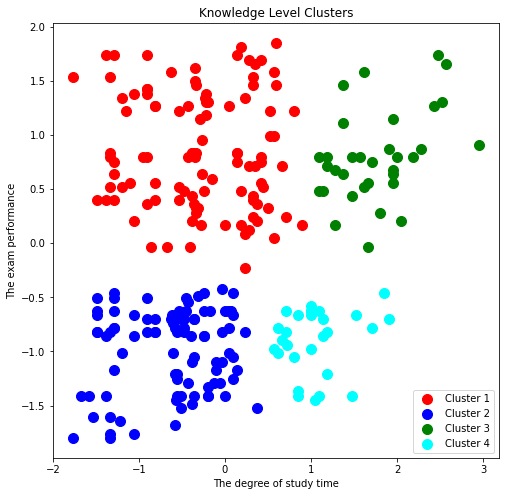

In [26]:
# Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Knowledge Level Clusters')
plt.xlabel('The degree of study time')
plt.ylabel('The exam performance')
plt.legend()
plt.show()

In [27]:
# Calculating the Silhouetter Score to determine the goodness of a clustering technique
score = metrics.silhouette_score(X, hc.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.2f' % score)

Silhouetter Score: 0.45


#The hierarchical clustering had 0.45 Silhouetter Score while the KMeans had 0.42 Silhouetter Score